# Good Bytes Dataset Review

This notebook will review the data obtained by the web scrapper. This cleans the dataset, then runs frequent itemset and ruleset mining to try to predict next ingredient.

## 1. Importing Data & Initial Analysis
Data was obtained via the Scrapper in goodbytes/Scrapper.py. Let's import the data and examine the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('scrapper_results.csv', encoding='latin1')

df.head()

,Recipe Name,Rating,Reviews,Ingredients,Directions,URL,Calories,Fat,Carbs,Protein
0,"Brown Rice, Chicken, and Chorizo Paella",4.0,2,"[{'quantity': '2', 'unit': 'teaspoons', 'name'...","Combine salt, paprika, red pepper, turmeric, a...",https://www.allrecipes.com/recipe/269005/brown...,465,22,43,22
1,Authentic Mexican Chile Rellenos,4.7,291,"[{'quantity': '6', 'unit': '', 'name': 'fresh ...",Preheat the oven broiler; set the oven rack ab...,https://www.allrecipes.com/recipe/219646/authe...,263,16,17,13
2,Argentinean Potato Salad,4.4,31,"[{'quantity': '4', 'unit': '', 'name': 'russet...",Bring a large pot of lightly salted water to a...,https://www.allrecipes.com/recipe/45044/argent...,271,18,22,6
3,Taiwanese Pork Chops,4.3,114,"[{'quantity': '4', 'unit': '', 'name': '(3/4 i...","With a sharp knife, make several small slits n...",https://www.allrecipes.com/recipe/83792/taiwan...,727,71,9,15
4,Jemput Jemput (Banana Fritters),4.1,34,"[{'quantity': '', 'unit': '', 'name': 'oil for...",Heat oil in a deep fryer or heavy-bottomed pan...,https://www.allrecipes.com/recipe/85508/jemput...,491,49,14,1


In [2]:
df.describe()

,Rating,Reviews,Calories,Fat,Carbs,Protein
count,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000
mean,4.493676,217.203080,320.109037,16.499796,29.492044,13.873113
std,0.370471,710.709151,214.003205,15.436420,22.896278,15.632440
min,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,4.300000,11.750000,167.000000,6.000000,12.000000,3.000000
50%,4.600000,48.000000,285.000000,13.000000,25.000000,8.000000
75%,4.700000,162.000000,425.000000,23.000000,42.000000,22.000000
max,5.000000,20139.000000,2895.000000,293.000000,281.000000,519.000000


### 1.1 Distributions of Ratings and Reviews
We only want the good recipes, so let's find a good cut off point for the number of reviews and ratings that would make a recipe good.

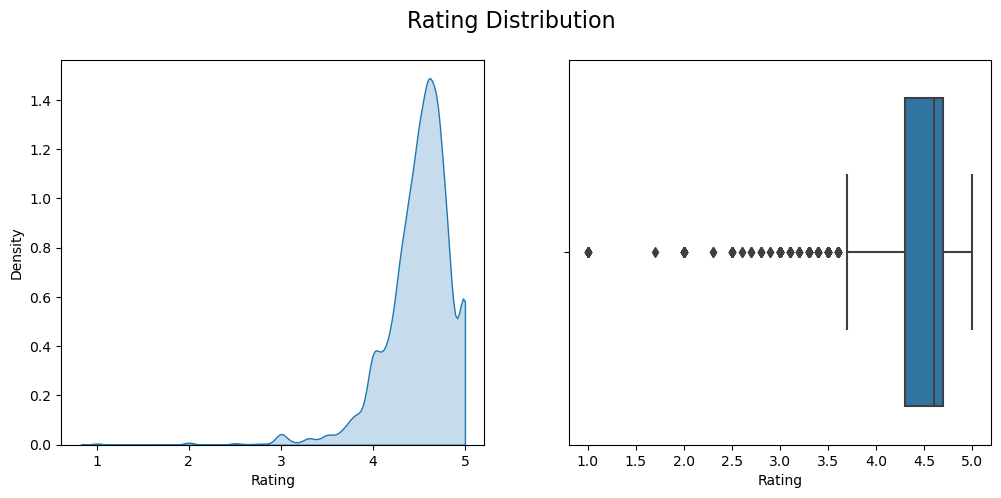

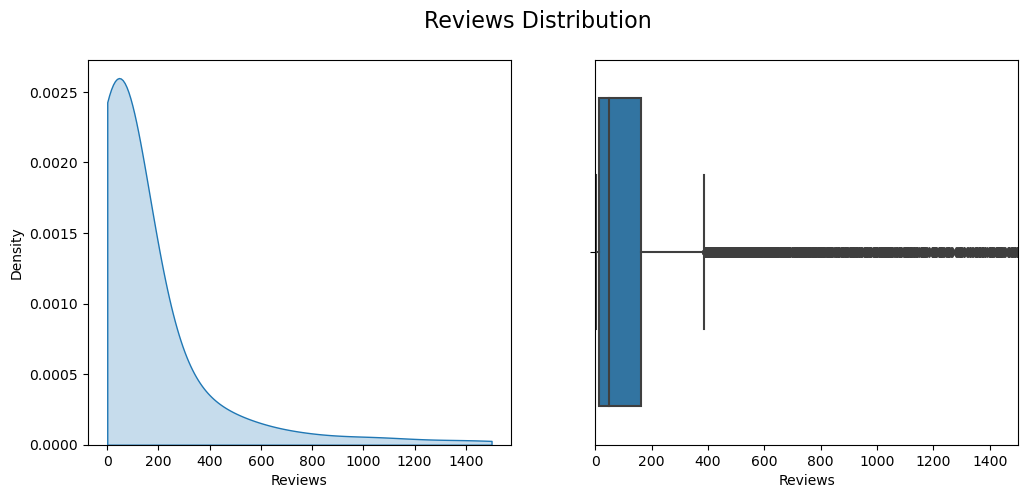

In [3]:
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(12, 5))

sns.kdeplot(df['Rating'], fill=True, clip=(0, 5), ax=ax[0])
sns.boxplot(x='Rating', data=df, ax=ax[1])
fig.suptitle('Rating Distribution', fontsize=16)
plt.show()

fig, ax = plt.subplots(1,2,figsize=(12, 5))

sns.kdeplot(df['Reviews'], fill=True, clip=(0, 1500), ax=ax[0])
sns.boxplot(x='Reviews', data=df, ax=ax[1])
ax[1].set_xlim(0, 1500)
fig.suptitle('Reviews Distribution', fontsize=16)
plt.show()

In [4]:
df = df.query("Rating >= 4.3 and Reviews >= 10")
df

,Recipe Name,Rating,Reviews,Ingredients,Directions,URL,Calories,Fat,Carbs,Protein
1,Authentic Mexican Chile Rellenos,4.7,291,"[{'quantity': '6', 'unit': '', 'name': 'fresh ...",Preheat the oven broiler; set the oven rack ab...,https://www.allrecipes.com/recipe/219646/authe...,263,16,17,13
2,Argentinean Potato Salad,4.4,31,"[{'quantity': '4', 'unit': '', 'name': 'russet...",Bring a large pot of lightly salted water to a...,https://www.allrecipes.com/recipe/45044/argent...,271,18,22,6
3,Taiwanese Pork Chops,4.3,114,"[{'quantity': '4', 'unit': '', 'name': '(3/4 i...","With a sharp knife, make several small slits n...",https://www.allrecipes.com/recipe/83792/taiwan...,727,71,9,15
6,Microwave Apple Crisp,4.5,158,"[{'quantity': '4', 'unit': 'large', 'name': 'G...",Spread apples evenly in an 8-inch square glass...,https://www.allrecipes.com/recipe/95383/microw...,382,16,60,3
8,Guacamole,4.8,7605,"[{'quantity': '3', 'unit': '', 'name': 'avocad...","Mash avocados, lime juice, and salt together i...",https://www.allrecipes.com/recipe/14231/guacam...,262,22,18,4
...,...,...,...,...,...,...,...,...,...,...
9795,Oh So Tender Brisket,4.5,106,"[{'quantity': '', 'unit': '', 'name': 'Roastin...",Preheat oven to 275 degrees F (135 degrees C)....,https://www.allrecipes.com/recipe/22529/oh-so-...,416,34,6,21
9796,Cauliflower Rice (Biryani-Style),4.9,30,"[{'quantity': '1', 'unit': 'head', 'name': 'ca...",Process cauliflower florets in a blender or fo...,https://www.allrecipes.com/recipe/259135/cauli...,123,9,10,3
9800,Slow Cooker Creamed Corn (Just Like Rudy's BBQ),4.7,38,"[{'quantity': '1', 'unit': 'cup', 'name': 'hea...","Stir whipping cream, cream cheese, butter, sug...",https://www.allrecipes.com/recipe/234375/slow-...,354,27,26,6
9802,Sweet Coconut Oatmeal,4.7,16,"[{'quantity': '1', 'unit': '(14 ounce) can', '...",Bring coconut milk to a gentle boil in a small...,https://www.allrecipes.com/recipe/245303/sweet...,490,35,45,7


### 1.2 Examining Data Trends
I'm just curious if there's a correlation between ratings and reviews. If a recipe has a higher rating, will more people try it and will it get more reviews?

I also want to see if there's a correlation between the rating and how healthy the food is. Maybe people just like recipes that have higher carbs or fat.

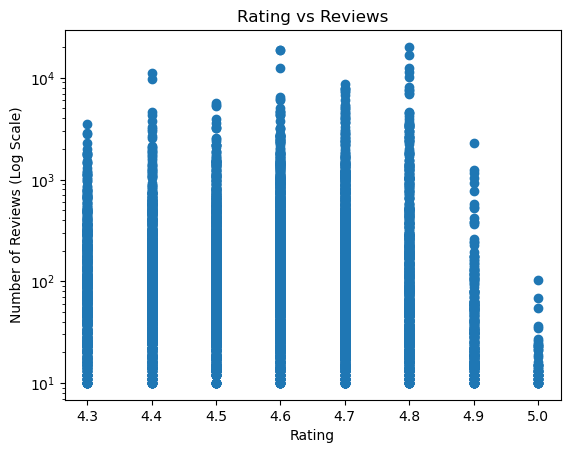

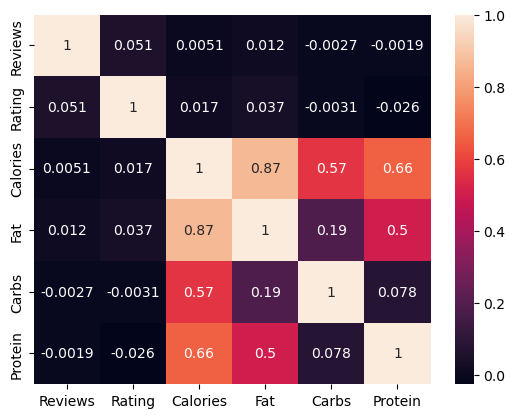

In [5]:
# Do higher rated recipes have more reviews?
plt.scatter(df['Rating'], df['Reviews'])
plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews (Log Scale)')
plt.title('Rating vs Reviews')
plt.show()

# Are higher rated recipes more unhealthy?
sns.heatmap(df[['Reviews','Rating', 'Calories', 'Fat', 'Carbs', 'Protein']].corr(), annot=True)
plt.show()

It could be that as a recipe gets more reviews, the chances of somebody gives it a poor review increases and it pushes the ratings toward the average. Recipes with 5 stars might get knocked down as they get more reviews. It looks like there's no strong correlations between rating and calories or macronutrients.

## 2. Ruleset Mining
Let's see what ingredients get used together.

### 2.1 Managing Ingridients
We need to get the ingredient names from the dataset. We should also try to get the base ingredient, and not care if the ingredient is "chopped" or "diced", etc.

In [6]:
import re
import inflect
import nltk

p = inflect.engine()

dirty_words = ["frozen", "chopped", "ground", "sliced", "to taste", "fresh",
                "dried", "peeled", "diced", "minced", "grated", "crushed",
                "cubed", "softened", "melted", "divided", "drained", "cooked",
                "uncooked", "shredded", "halved", "quartered", "pitted",
                "deveined", "shelled", "boned", "skinned", "trimmed", "hot",
                "cold", "warm", "boiling", "lukewarm", "warm", "room temperature",
                "large chunks of", "high quality", "home made", "homemade", "all purpose",
                "all-purpose", "fried", "baked", "roasted", "steamed", "broiled", "packed",
                "quick cooking", "quick", "finely", "low-sodium", "low-fat", "low-calorie",
                "blanched", "active", "fine", "grated", "low-moisture", 'low-carb',
                'fire roasted', 'fire-roasted', 'medium', "ly ", "mashed", "low sodium",
                'low moisture', 'semisweet', 'bonelss', 'skinless']

def remove_adjectives(text):
    if not text:
        return ""
    words = nltk.word_tokenize(text)
    pos = nltk.pos_tag(words)
    no_adj = [word for word, pos in pos if pos != 'JJ']
    return ' '.join(no_adj)

def clean_ingredients(dirty_ingredient):
    if not dirty_ingredient:
        return ""
        
    ingredient = dirty_ingredient.split(",")[0].lower()
    
    for word in dirty_words:
        ingredient = ingredient.replace(word, "")
        
    ingredient = remove_adjectives(ingredient)
    
    ingredient = ingredient.split("(")[0]
    ingredient = ingredient.split("-")[0]
    ingredient = ingredient.split(" or ")[0]
    ingredient = ingredient.split(" for ")[0]
    
    if ingredient == "":
        return ""

    ingredient = p.singular_noun(ingredient) or ingredient

    return ingredient.strip()

def split_ingredients(ingredients):
    if not ingredients:
        return []
    
    ingredients = re.findall(r'\{(.*?)\}', ingredients)
    ingredient_list = []
    
    for ingredient in ingredients:
        ingredient_name = ingredient.split("'")[-2]
        ingredient_name = clean_ingredients(ingredient_name)
        if ingredient_name:
            ingredient_list.append(ingredient_name)
    
    return ingredient_list

def split_ingredients_with_quantities(ingredients):
    if not ingredients:
        return []
    
    ingredients = re.findall(r'\{(.*?)\}', ingredients)
    ingredient_list = []
    
    for ingredient in ingredients:
        ingredient_quantity = ingredients[0].split("'")[3]
        ingredient_unit = ingredient.split("'")[7]
        ingredient_name = ingredient.split("'")[-2] 
        ingredient_name = clean_ingredients(ingredient_name)
        if ingredient_name:
            ingredient_list.append(f"{ingredient_quantity} {ingredient_unit} {ingredient_name}")
    
    return ingredient_list
    
df['Processed_Ingredients'] = df['Ingredients'].apply(split_ingredients)
df['Processed_Ingredients_Quantities'] = df['Ingredients'].apply(split_ingredients_with_quantities)
df.to_csv('processed_recipes.csv', index=False)

### 2.2 Decide which ingredients we will keep
We tried our best to clean the ingredients, but there are still some obscure ones, like "brain", that should be removed. We can introduce a cutoff point and require ingredietns to occur at least that many times before we will consider it in our analysis.

In [10]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(df['Processed_Ingredients']).transform(df['Processed_Ingredients'])
ingredient_df = pd.DataFrame(te_ary, columns=te.columns_)

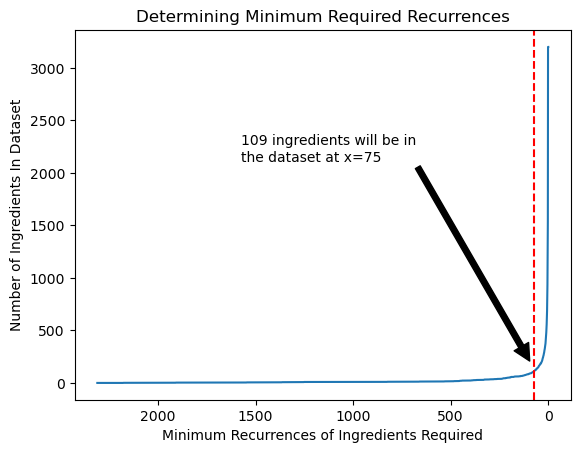

Ingredients will need to show up 75 times to be included in the dataset. This will result in 109 ingredients in the dataset.
Ingredients to be included: salt, onion, oil, butter, sugar, egg, garlic, flour, pepper, water, salt and pepper, milk, vanilla extract, brown sugar, cinnamon, cream, cheese, powder, bell pepper, parsley, tomato, baking soda, baking powder, cheddar cheese, chicken broth, lemon juice, carrot, celery, cayenne pepper, oregano, beef, cumin, cream cheese, basil, soy sauce, mayonnaise, paprika, potato, cooking spray, thyme, cilantro, vinegar, nutmeg, pepper flake, bacon, walnut, chili powder, mushroom, worcestershire sauce, bay leaf, kosher salt, wine, clove, honey, cornstarch, ginger, lemon, onion powder, bean, mustard, mozzarella cheese, zucchini, tomato sauce, chocolate chip, bread crumb, rosemary, margarine, tomato paste, pecan, ketchup, shortening, whipping cream, rice, cabbage, shrimp, yeast, jalapeno pepper, beef broth, spinach, raisin, apple, lime, wine vinegar,

In [11]:
CUTOFF = 75

value_counts = ingredient_df.sum(axis=0).sort_values(ascending=False)

included_ingredients_count = [len(value_counts[value_counts >= i]) for i in range(0, value_counts.max())]
included_ingredients_count = pd.Series(included_ingredients_count, index=range(0, value_counts.max()))
ax = included_ingredients_count.plot()
ax.invert_xaxis()
ax.set_xlabel('Minimum Recurrences of Ingredients Required')
ax.set_ylabel('Number of Ingredients In Dataset')
ax.set_title('Determining Minimum Required Recurrences')

ax.axvline(x=CUTOFF, color='red', linestyle='--')
ax.annotate(f'{included_ingredients_count[CUTOFF]} ingredients will be in\nthe dataset at x={CUTOFF}', xy=(CUTOFF+20, included_ingredients_count[CUTOFF] + 100), xytext=(CUTOFF + 1500, included_ingredients_count[CUTOFF] + 2000), arrowprops=dict(facecolor='black'))
plt.show()
print(f"Ingredients will need to show up {CUTOFF} times to be included in the dataset. This will result in {included_ingredients_count[CUTOFF]} ingredients in the dataset.")

ingredients_to_include = value_counts[value_counts > CUTOFF].index.to_list()
ingredient_df = ingredient_df[ingredients_to_include]

print(f"Ingredients to be included: {p.join(ingredient_df.columns.to_list())}.")

### 2.3 Frequent Itemset analysis
Let's see what ingredients are often used together. I set a pretty loose support because I want a lot of results.

In [12]:
frequent_itemsets = apriori(ingredient_df, min_support=0.005, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.query('length >= 2').sort_values(by='support', ascending=False).head(50)

,support,itemsets,length
202,0.145843,"(garlic, onion)",2
198,0.143815,"(oil, onion)",2
111,0.139136,"(salt, sugar)",2
114,0.136172,"(salt, flour)",2
115,0.134144,"(salt, pepper)",2
112,0.133676,"(salt, egg)",2
285,0.132273,"(garlic, oil)",2
108,0.128997,"(salt, onion)",2
424,0.127905,"(egg, sugar)",2
110,0.127749,"(salt, butter)",2


### 2.4 Rueset Mining
Let's see what ingredients imply others. We can then examine which ingredients are likely to be used, given input ingredients. Again, I'm using low thresholds so that we get more rules.

In [13]:
rule_mining = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.10)
rule_mining.sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
45420,"(salt, flour, brown sugar, walnut, vanilla ext...",(egg),0.005303,0.240992,0.005303,1.0,4.149515,0.004025,inf,0.763055
61257,"(salt, baking soda, baking powder, cinnamon, w...","(egg, sugar)",0.005459,0.127905,0.005459,1.0,7.818293,0.004761,inf,0.876882
46971,"(oil, flour, walnut, sugar, vanilla extract)",(egg),0.005927,0.240992,0.005927,1.0,4.149515,0.004499,inf,0.763534
34351,"(flour, egg, brown sugar, chocolate chip)",(baking soda),0.005147,0.070504,0.005147,1.0,14.183628,0.004784,inf,0.934305
19694,"(salt, sugar, oil, walnut)",(egg),0.007019,0.240992,0.007019,1.0,4.149515,0.005328,inf,0.764373
...,...,...,...,...,...,...,...,...,...,...
32997,"(sugar, baking powder)","(egg, nutmeg, cinnamon)",0.057713,0.011543,0.005771,0.1,8.663514,0.005105,1.098286,0.938752
21664,"(sugar, baking powder)","(salt, butter, brown sugar)",0.057713,0.024333,0.005771,0.1,4.109615,0.004367,1.084074,0.803013
54267,"(sugar, baking powder)","(salt, oil, cinnamon, flour, vanilla extract)",0.057713,0.009671,0.005771,0.1,10.340323,0.005213,1.100366,0.958616
4909,(cheddar cheese),"(flour, butter)",0.063953,0.119950,0.006395,0.1,0.833680,-0.001276,0.977833,-0.175687


In [14]:
import inflect

p = inflect.engine()

for _, rule in rule_mining.iterrows():
    if 'tomato' in rule['antecedents']:
        antecedents = p.join(list(rule['antecedents']))
        consequents = p.join(list(rule['consequents']))
        print(f"If {antecedents}, then {consequents} ({rule['confidence']*100:.2f}%)")


If tomato, then salt (38.41%)
If tomato, then onion (77.48%)
If tomato, then oil (50.11%)
If tomato, then butter (10.82%)
If tomato, then sugar (14.13%)
If tomato, then garlic (54.08%)
If tomato, then pepper (31.57%)
If tomato, then water (21.19%)
If tomato, then salt and pepper (27.81%)
If tomato, then cheese (12.36%)
If tomato, then bell pepper (24.94%)
If tomato, then parsley (14.57%)
If tomato, then chicken broth (12.14%)
If tomato, then carrot (12.36%)
If tomato, then celery (12.36%)
If tomato, then oregano (17.66%)
If tomato, then beef (14.35%)
If tomato, then cumin (15.23%)
If tomato, then basil (19.65%)
If tomato, then cilantro (13.02%)
If tomato, then chili powder (11.92%)
If salt and tomato, then onion (83.33%)
If tomato and onion, then salt (41.31%)
If tomato, then salt and onion (32.01%)
If salt and tomato, then oil (50.57%)
If tomato and oil, then salt (38.77%)
If tomato, then salt and oil (19.43%)
If salt and tomato, then sugar (22.41%)
If tomato and sugar, then salt (60.

In [15]:
def get_next_ingredient(current_ingredients, rule_mining, num_results=1):
    if not isinstance(current_ingredients, list):
        current_ingredients = [current_ingredients]

    current_ingredients_frozenset = frozenset(current_ingredients)
    matching_rules = rule_mining[rule_mining['antecedents'].apply(lambda x: x == current_ingredients_frozenset)]
    next_ingredients = matching_rules.sort_values('confidence', ascending=False).head(num_results)['consequents']
    next_ingredients_list = [list(x) for x in next_ingredients]

    output_list = [current_ingredients + suggestion for suggestion in next_ingredients_list]

    return output_list[0] if output_list else current_ingredients

ingredient_list = ['tomato']
for _ in range(0,10):
    ingredient_list = get_next_ingredient(ingredient_list, rule_mining)

print(ingredient_list)



['tomato', 'onion', 'garlic', 'oil', 'salt', 'pepper']


## 3. Next Steps

Some improvements to this project could be:
- **Refining the Scrapper**: Currently, it misses a lot of recipes because they are missing html components.
- **Refining Ingredient Cleaning**: There's still a lot of common ingredients that aren't in our ingredient list.
- **Examine different thresholds, limits, etc**: We can get more rules and ingredients by playing around with the CUTOFF, thresholds, limits, etc, above.